In [111]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [78]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [79]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [81]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


2. #Write a query that filters the Measurement table to retrieve the temperatures for the month of June.  

#june_temp = []

june_temp =session.query(Measurement).filter(extract('month', Measurement.date)== 6)
                                                                
                                                                                                                                      
print(june_temp)


SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [82]:
#  3. Convert the June temperatures to a list.
june_list = [temp.tobs for temp in june_temp]
june_list


[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [85]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(june_list, columns=['june_temp'])


In [87]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,june_temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


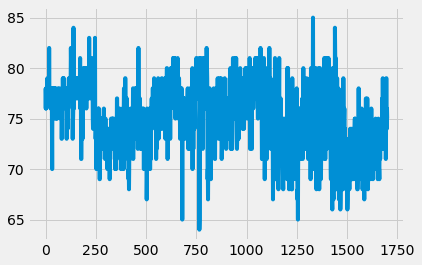

In [122]:
# plot a line graph
plt.plot(jun_df["june_temp"])
plt.show()


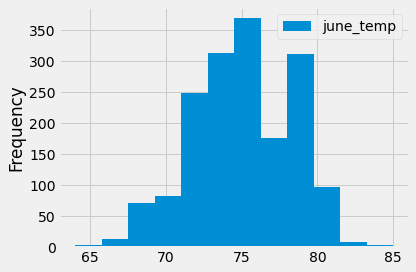

In [89]:
jun_df.plot.hist(bins =12)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [68]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp =session.query(Measurement).filter(extract('month', Measurement.date)== 12)
print(dec_temp)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [70]:
# 7. Convert the December temperatures to a list.
dec_list = [temp.tobs for temp in dec_temp]
len(dec_list)

1517

In [72]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_list, columns=['dec_temp'])

In [74]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,dec_temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


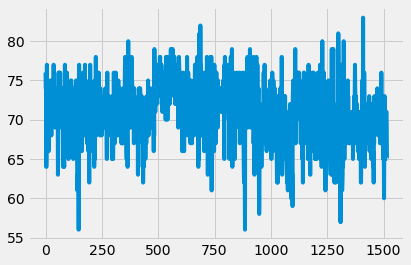

In [124]:
# plot a line graph
plt.plot(dec_df["dec_temp"])
plt.show()

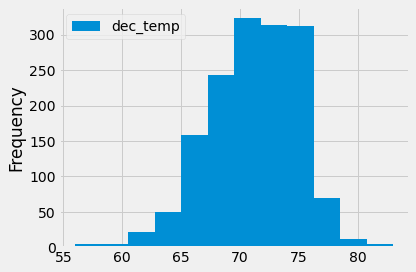

In [90]:
dec_df.plot.hist(bins =12)
plt.tight_layout()
